In [1]:
import pandas as pd
from dendrogram_ts import *
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

## Load Data
Download from https://www.kaggle.com/varat7v9/chillerpower

In [2]:
df = pd.read_csv("ChillerPowerData.csv")
df2 = df[["Id", "COOLSYS1 CHILLER 1:Chiller Electric Power [W](TimeStep)"]]
df2.columns = ["hour", "power"]

In [3]:
df2.head()

,hour,power
0,1,1490.756302
1,2,2813.508506
2,3,2092.218351
3,4,2793.959105
4,5,293.612920


## Format Data

In [4]:
# split timeseries by 24 hour windows
df_list = []
for i in range(40):
    if i == 0:
        df_list.append(df2[:24]["power"].reset_index(drop=True))
    else:
        step = 24*i+1
        df_list.append(df2[step:step+24]["power"].reset_index(drop=True))

# concat each window into a dataframe & transpose
df = pd.concat(df_list, axis=1).T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
power,1490.756302,2813.508506,2092.218351,2793.959105,293.612920,1.918744,-1252.569365,-2153.417104,92107.248717,94234.238290,...,73159.372864,93095.378832,97096.197653,44446.813873,22238.031902,14894.723228,9819.398638,6187.687864,6743.515822,4326.171323
power,2397.424340,2800.260177,2251.538029,4446.458912,6442.990775,147423.930298,131355.963343,124948.566231,101777.506047,121671.407116,...,199929.321246,183136.168156,198316.006793,191184.358362,193355.723065,188452.926291,184260.722740,3335.745528,2643.705417,2695.572946
power,1249.782354,-103.381765,1474.556590,56.968231,1097.075060,122786.332612,101294.585724,123371.782893,125291.591091,150383.386499,...,189815.560071,180620.041270,179487.298897,173767.868105,165500.776935,171296.280977,167704.660236,-3244.646206,-2120.050897,-233.961369
power,-567.785517,-563.006692,-444.421685,2768.854513,4269.168824,150813.315541,127822.851520,141821.199009,151918.082262,146022.979817,...,223637.428463,214594.526470,203305.384761,186806.328087,176054.169596,159437.763354,161984.250767,-5055.323390,-4803.862389,764.944744
power,910.971185,901.492451,1927.375305,-582.447299,-1566.897215,116447.902104,91037.255432,130760.153251,128982.933450,144310.152639,...,189571.505616,201666.626075,197542.630214,172736.952013,144956.489132,121327.458852,117722.409650,-12833.469122,-6298.065870,927.577434


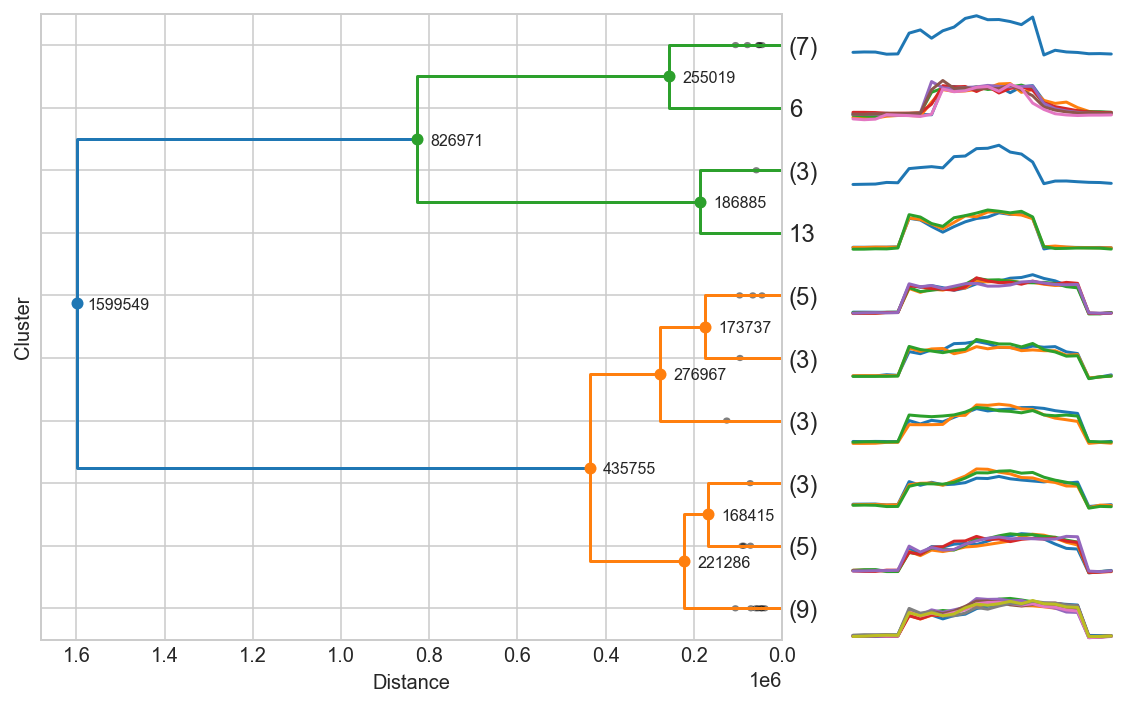

In [5]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,5));
ret = maxclust_draw(df, 'ward', 'euclidean', max_cluster=10, ts_hspace=3, dist_label=True);

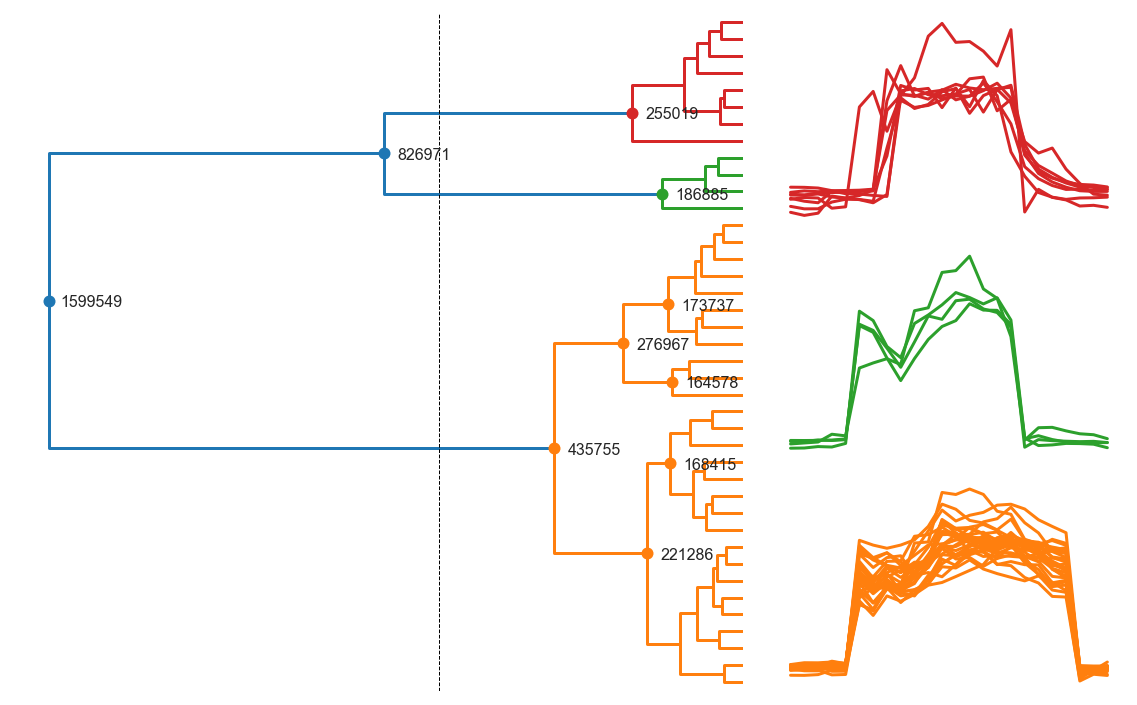

In [6]:
plt.figure(figsize=(8,5));
colorclust_draw(df, 'ward', 'euclidean', 
    color_threshold=700000, 
    ts_hspace=1,
    dist_label=True)

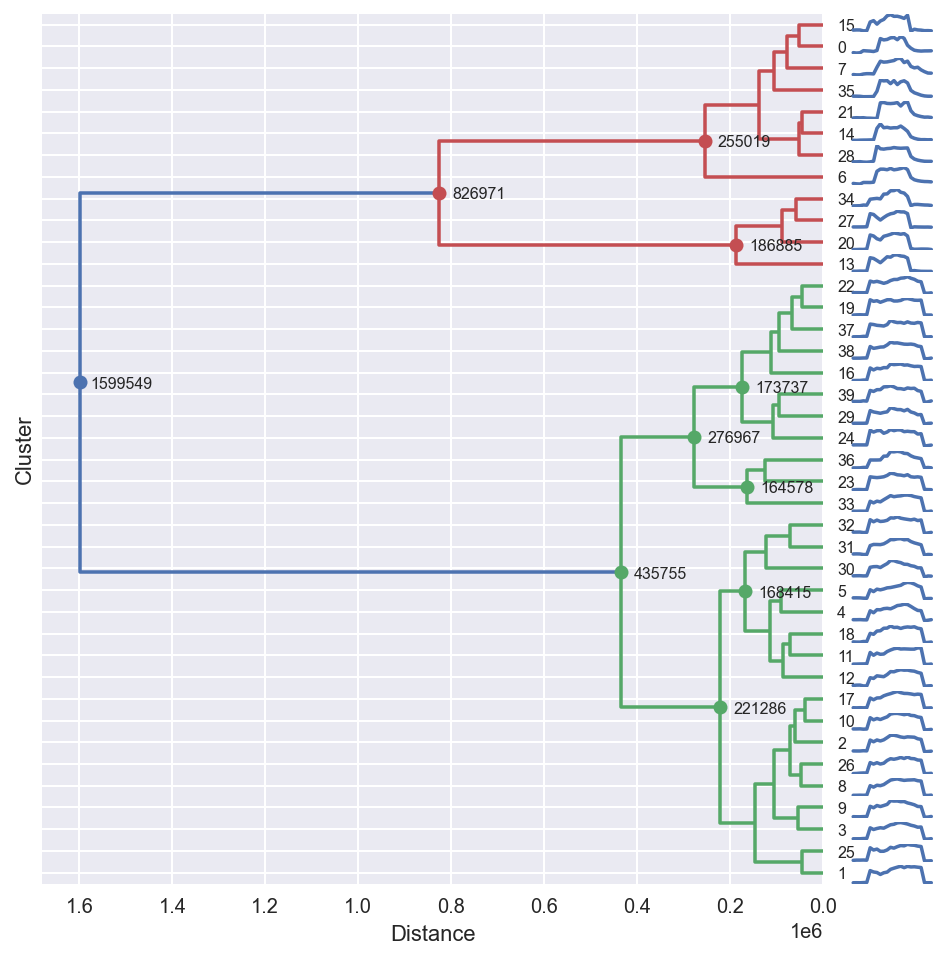

In [7]:
plt.figure(figsize=(8,8));
plt.style.use('seaborn')
allclust_draw(df, 'ward', 'euclidean', ts_hspace=4, dist_label=True)